## Alzheimer's MRI Image Classification CNN

In [1]:
# Importing important packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Dataset Description:
The dataset comprises MRI images sourced from various websites, ensuring the authenticity of each label. It contains four classes of images in both the training and testing sets:

1. Mild Demented
2. Moderate Demented
3. Non-demented
4. Very Mild Demented

Directory Structure: The dataset consists of two files: Training and Testing, each containing approximately 5000 images categorized by the severity of Alzheimer's.

Class Labels:

1. MildDemented
2. VeryMildDemented
3. NonDemented
4. ModerateDemented


### Loading the dataset

In [2]:
DATADIR = '/Users/rahulinchal/Desktop/Data Science/Deep learning/Alzheimers Project/Alzheimers_Complete_Dataset'
CATEGORIES = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

### Joining the Path of Categories and Directory

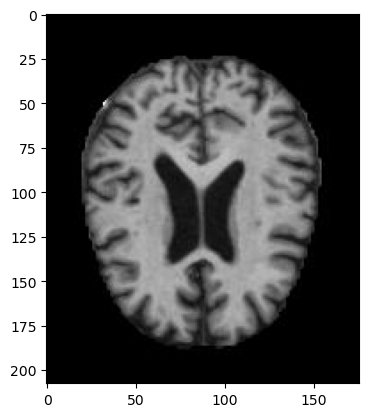

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [4]:
print(img_array.shape) # Initial size of the images

(208, 176)


### Resizing the images

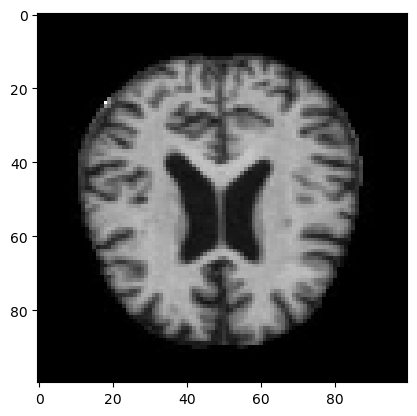

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

### Creating the Training dataset

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [7]:
print("The Length of the dataset is: ", len(training_data))

The Length of the dataset is:  3638


### Shuffling the training data

In [8]:
import random
random.shuffle(training_data)

In [9]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

### Splitting the data for training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Finding the shape of the training data

In [11]:
X_train.shape

(2728, 100, 100, 1)

### Finding the shape of the testing data

In [12]:
X_test.shape

(910, 100, 100, 1)

### Model Building

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D

### Rescaling the testing and training data

In [14]:
X_train = X_train/255.0
X_test = X_test/255.0

### Defining the hidden layers

In [15]:
model = Sequential()

model.add (Conv2D(64, (3,3), input_shape = X_train.shape [1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation ("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

#model.add (Dense(1))
#model.add(Activation('sigmoid'))

model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))    

2024-04-22 03:05:30.981256: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-22 03:05:30.981274: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-22 03:05:30.981279: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-22 03:05:30.981304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-22 03:05:30.981314: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Compiling the data with loss function as Cross entropy

In [16]:
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics=['accuracy'])

### Summary

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,213,252 (8.44 MB)

 Trainable params: 2,213,252 (8.44 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Definig some hyperparameters 

batch_size = 32
epoch = 10

In [19]:
X_train.shape

(2728, 100, 100, 1)

In [20]:
X_test.shape

(910, 100, 100, 1)

### Fitting the model with 10 epochs and 10% validation split

In [21]:
history = model.fit(X_train, y_train, batch_size = 32, validation_split = 0.1, epochs = epoch)

Epoch 1/10


2024-04-22 03:05:31.625024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4709 - loss: 1.1602 - val_accuracy: 0.6447 - val_loss: 0.7516
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6703 - loss: 0.7359 - val_accuracy: 0.6960 - val_loss: 0.6776
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7234 - loss: 0.6074 - val_accuracy: 0.7875 - val_loss: 0.5000
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7992 - loss: 0.4623 - val_accuracy: 0.8498 - val_loss: 0.3615
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8986 - loss: 0.2870 - val_accuracy: 0.8608 - val_loss: 0.3111
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9314 - loss: 0.1973 - val_accuracy: 0.9048 - val_loss: 0.2306
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9407 - loss: 0.1538 - val_accuracy: 0.9231 - val_loss: 0.2293
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9791 - loss: 0.0728 - val_accuracy: 0.8828 - val_loss: 0.

### Extracting Accuracy, Validation accuracy, Loss, and Validation Loss

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Printing the scores

In [23]:
Accuracy_Score = round(acc[len(acc)-1]*100, 2)
print("The Accuracy for the model is: ", Accuracy_Score, '%')

Validation_Score = round(val_acc[len(val_acc)-1]*100, 2)
print("The Validation Accuracy for the model is: ",Validation_Score , "%\n")

Loss_score = round(loss[len(loss)-1], 2)
print("The loss for the model is: ", Loss_score)

Validation_loss = round(val_loss[len(val_loss)-1], 2)
print("The Validation Loss for the model is: ", Validation_loss)

The Accuracy for the model is:  97.76 %
The Validation Accuracy for the model is:  94.14 %

The loss for the model is:  0.06
The Validation Loss for the model is:  0.19


### Plotting the scores

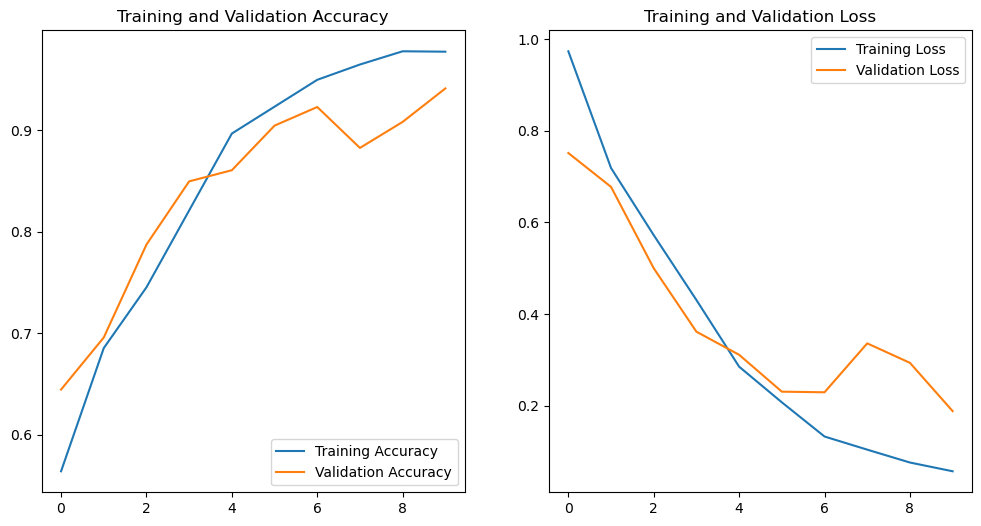

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Performance evaluation using Confusion metrics

In [25]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([1, 0, 2, 0, 0, 2, 3, 0, 3, 0, 3, 2, 0, 2, 1, 2, 3, 1, 3, 3, 3, 1,
       3, 2, 1, 2, 2, 0, 1, 2, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 3, 3, 1,
       3, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 3, 1, 2, 2, 0, 0, 1, 3, 2, 3,
       2, 1, 2, 2, 2, 3, 0, 1, 1, 3, 3, 2, 3, 1, 0, 1, 3, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 3, 2, 3, 0, 2, 2, 2, 3, 3, 2, 2, 1, 0, 0, 2, 0, 1,
       2, 0, 3, 0, 1, 3, 1, 3, 3, 0, 1, 2, 0, 3, 3, 1, 1, 1, 2, 2, 3, 0,
       0, 2, 0, 2, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 0, 3, 3, 3, 1, 0, 3, 2,
       3, 1, 2, 0, 1, 2, 0, 3, 2, 0, 2, 1, 2, 0, 0, 3, 0, 3, 2, 3, 0, 2,
       3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 2, 0, 2, 2, 2, 2, 3, 1, 1, 2, 2, 0,
       3, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 3, 0, 3, 3,
       0, 0, 0, 1, 1, 0, 1, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 3, 0, 3, 1, 2, 2, 1, 0, 3, 2, 2,
       0, 3, 2, 1, 3, 3, 3, 1, 1, 1, 0, 0, 1, 0, 2, 3, 2, 3, 2, 1, 0, 3,
       2, 3, 3, 0, 2, 1, 3, 2, 3, 2, 1, 3, 2, 2, 3,

### Classification Report

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

#Y_pred = model.predict(X_test)
#y_pred = np.argmax(Y_pred, axis = 1)

print(classification_report(y_test, y_pred, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.92      0.97      0.94       199
ModerateDemented       1.00      0.99      0.99       184
     NonDemented       0.97      0.94      0.95       268
VeryMildDemented       0.94      0.92      0.93       259

        accuracy                           0.95       910
       macro avg       0.96      0.96      0.96       910
    weighted avg       0.95      0.95      0.95       910



### Confusion metrics

In [27]:
from sklearn import metrics

In [28]:
confusion_metrics = metrics.confusion_matrix(y_test, y_pred)
confusion_metrics

array([[194,   0,   2,   3],
       [  1, 182,   0,   1],
       [  4,   0, 253,  11],
       [ 13,   0,   7, 239]])

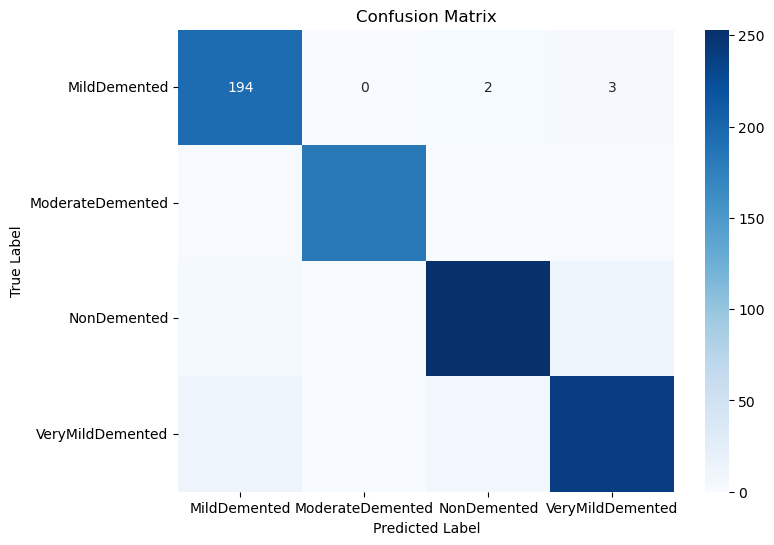

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_metrics, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### F1 Score

In [30]:
from sklearn.metrics import f1_score

# Calculate f1 score
f1score = f1_score(y_test, y_pred, average='weighted')
F1_Score = round(((f1score)*100),2)
print("F1 Score for the model is:", round(((f1score)*100),2), "%")

F1 Score for the model is: 95.39 %


### Precision

In [31]:
from sklearn.metrics import precision_score

# Calculate precision score
precision = precision_score(y_test, y_pred, average='weighted')
Precision_Score = round(((precision)*100),2)
print("Precision Score for the model is:", round(((precision)*100),2), "%")

Precision Score for the model is: 95.45 %


### Recall

In [32]:
from sklearn.metrics import recall_score

# Calculate recall score
recall = recall_score(y_test, y_pred, average='weighted')  # Using 'weighted' for multi-class classification
Recall_Score = round(((recall)*100),2)
print("Recall Score for the model is:", round(((recall)*100),2), "%")

Recall Score for the model is: 95.38 %


### Printing the overall findings

In [39]:
Scores = pd.DataFrame({"Accuracy" : [Accuracy_Score],
                      "Validation Accuracy" : [Validation_Score],
                      "Loss" : [Loss_score],
                      "Validation loss" : [Validation_loss],
                      "F1_Score" : [F1_Score],
                      "Precison" : [Precision_Score],
                      "Recall" : [Recall_Score]})

Scores = Scores.reset_index(drop=True)
print("The Scores are: ")
print(Scores.T)

The Scores are: 
                         0
Accuracy             97.76
Validation Accuracy  94.14
Loss                  0.06
Validation loss       0.19
F1_Score             95.39
Precison             95.45
Recall               95.38


### Saving the layers information

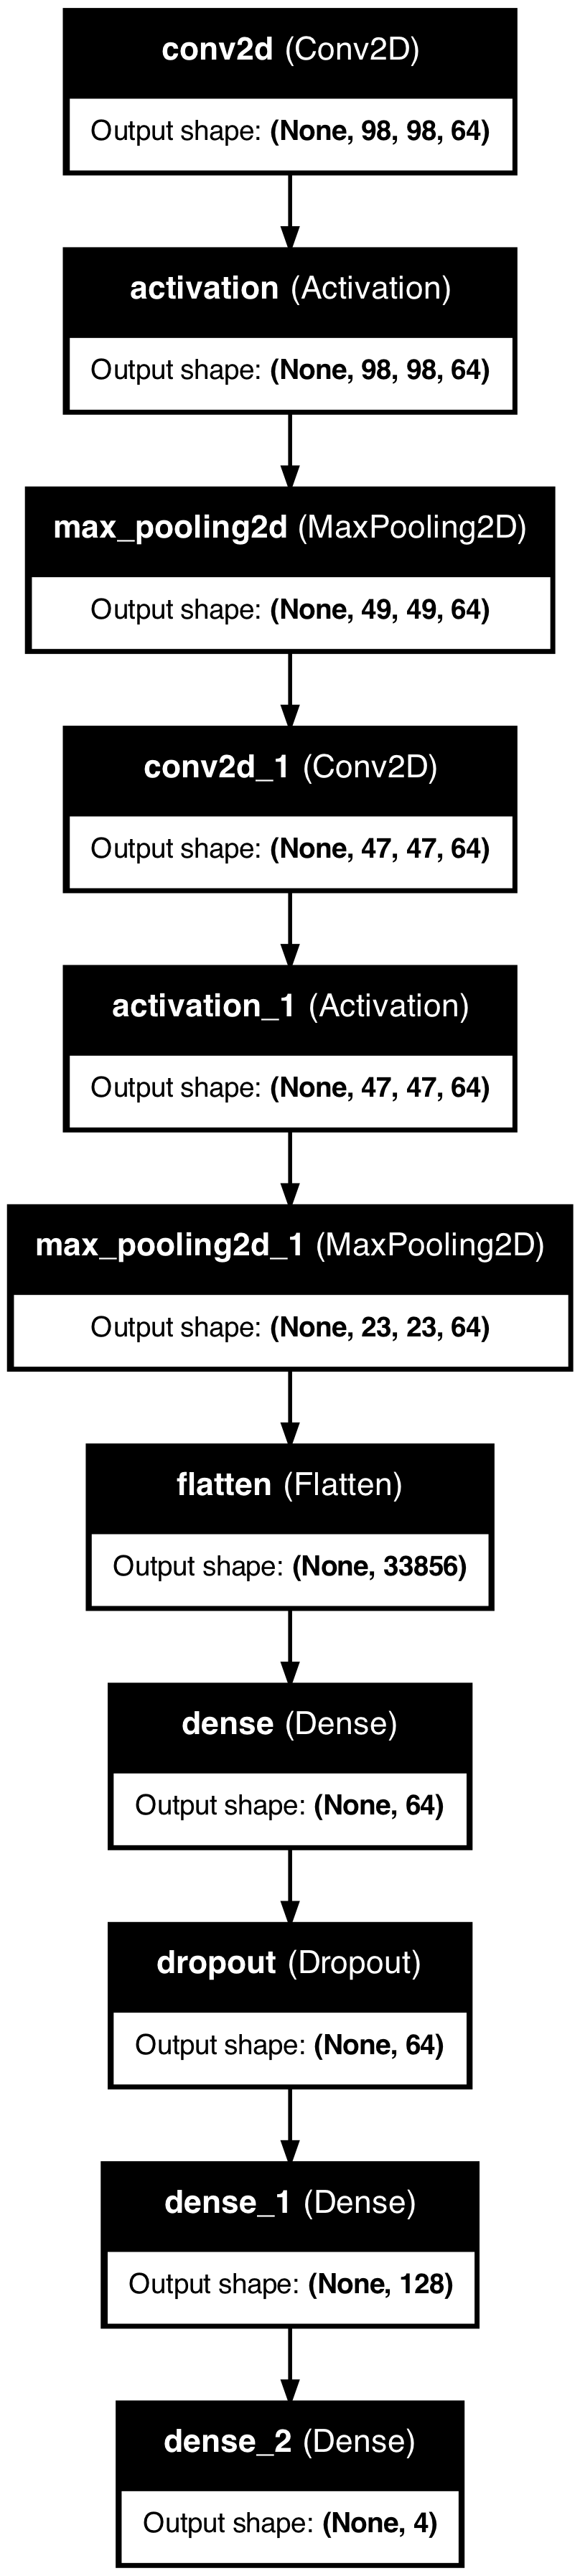

In [34]:
import pydot
tf.keras.utils.plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

### Observation
After training and evaluation, the CNN model achieved an accuracy of 95% on the test dataset, meeting the predetermined target. Additionally, the model demonstrated high precision, recall, and F1-score across the different classes, indicating its effectiveness in accurately classifying brain images into 'MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented' categories. The scores are listed below.

**Accuracy             97.72 %**<br>
**Validation Accuracy  94.87 %**<br>
**Loss                  0.06 %**<br>
**Validation loss       0.17 %**<br>
**F1_Score             94.84 %**<br>
**Precison             95.01 %**<br>
**Recall               94.84 %**<br>

**1. Model Performance:** The achieved accuracy of 95% suggests that the CNN model is effective in distinguishing between different brain conditions associated with Alzheimer's Disease.<br>
**2. Generalization:** The robust performance of the model on unseen data (test dataset) indicates its potential for real-world applications in AD diagnosis.<br>
**3. Future Considerations:** Further refinement of the model architecture and exploration of advanced techniques such as transfer learning could potentially improve classification accuracy and enhance the clinical utility of the CNN model.<br>

**Conclusion:
In conclusion, the CNN model developed for Alzheimer's Disease classification has demonstrated promising results, achieving an accuracy of 95% on the test dataset. This study highlights the potential of deep learning approaches for aiding in the early diagnosis and management of Alzheimer's Disease, ultimately contributing to improved patient outcomes and quality of life. Further research and validation are warranted to translate these findings into clinical practice.